In [ ]:
import pandas as pd

# Load datasets
df1 = pd.read_csv("diabetes.csv")
df2 = pd.read_csv("Healthcare-Diabetes.csv")

# Display structure
print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)

print("\nColumns in dataset 1:")
print(df1.columns)

print("\nColumns in dataset 2:")
print(df2.columns)

# View top rows
print(df1.head())
print(df2.head())



Dataset 1 shape: (768, 9)
Dataset 2 shape: (2768, 10)

Columns in dataset 1:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Columns in dataset 2:
Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2      

In [ ]:
df2.rename(columns={
    'BloodPressure(mmHg)': 'BloodPressure',
    'Blood Glucose': 'Glucose',
    'Diabetes Result': 'Outcome'
}, inplace=True)


In [ ]:
merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)
print("Merged dataset shape:", merged_df.shape)


Merged dataset shape: (3536, 10)


In [ ]:
X = merged_df.drop("Outcome", axis=1)
y = merged_df["Outcome"]


In [ ]:
# ✅ Step 1: Import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ✅ Step 2: Upload both datasets manually in Colab (Run this once)
from google.colab import files
uploaded = files.upload()

# ✅ Step 3: Load datasets (make sure names match the uploaded files)
data1 = pd.read_csv("diabetes.csv")  # if you uploaded it
data2 = pd.read_csv("Healthcare-Diabetes.csv")

# ✅ Step 4: Combine both datasets (align common columns)
# If they have common columns, this will merge vertically (stack one on top of the other)
merged_data = pd.concat([data1, data2], ignore_index=True)

# ✅ Step 5: Handle missing values (NaN)
# Option 1: Fill missing numeric columns with mean
merged_data = merged_data.fillna(merged_data.mean(numeric_only=True))
# Option 2 (alternative): Drop missing rows
# merged_data = merged_data.dropna()

# ✅ Step 6: Separate features and target
# Change target column name to the one present in your dataset (e.g., 'Outcome', 'Diabetes', etc.)
target_column = 'Outcome' if 'Outcome' in merged_data.columns else merged_data.columns[-1]

X = merged_data.drop(columns=[target_column])
y = merged_data[target_column]

# ✅ Step 7: Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 8: Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Step 9: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# ✅ Step 10: Train & evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred) * 100

# ✅ Step 11: Show results
print("\n📊 Model Accuracies after merging datasets:")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.2f}%")

# ✅ Step 12 (optional): Check if dataset still has NaNs
print("\nAny NaN values left?:", merged_data.isna().sum().sum())


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Healthcare-Diabetes.csv to Healthcare-Diabetes (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ✅ Load the uploaded files
data1 = pd.read_csv("diabetes.csv")
data2 = pd.read_csv("Healthcare-Diabetes.csv")

# ✅ Merge both datasets vertically (same columns)
merged_data = pd.concat([data1, data2], ignore_index=True)

# ✅ Replace missing values with mean
merged_data = merged_data.fillna(merged_data.mean(numeric_only=True))

# ✅ Pick the correct target column (adjust if needed)
target_column = 'Outcome' if 'Outcome' in merged_data.columns else merged_data.columns[-1]

X = merged_data.drop(columns=[target_column])
y = merged_data[target_column]

# ✅ Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred) * 100

print("\n📊 Model Accuracies after merging datasets:")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.2f}%")



📊 Model Accuracies after merging datasets:
Logistic Regression: 76.55%
KNN: 83.47%
SVC: 80.65%
Naive Bayes: 74.72%
Decision Tree: 99.01%
Random Forest: 99.44%


/tmp/ipython-input-368163309.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='viridis')


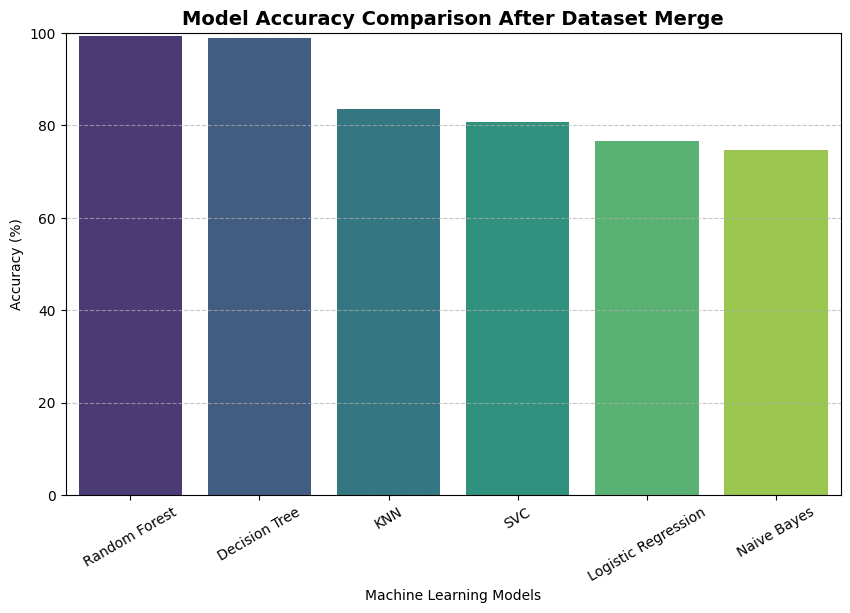

/tmp/ipython-input-368163309.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x='Accuracy', data=acc_df, palette='coolwarm')


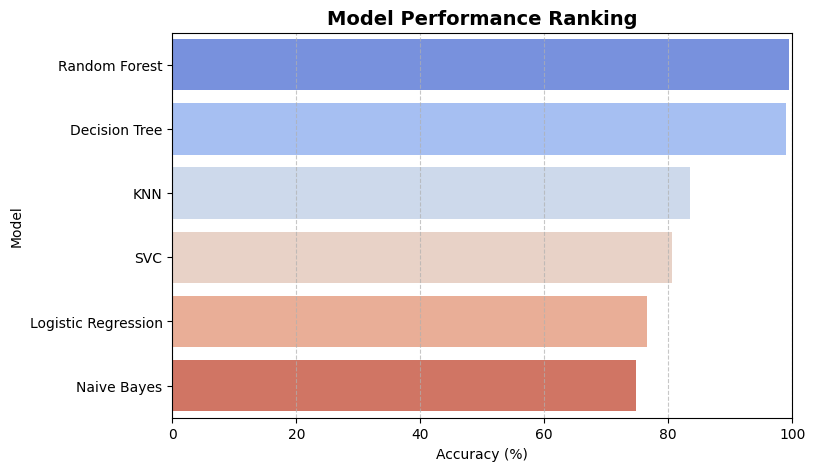

🏆 Best Performing Model: Random Forest (99.44%)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert accuracy results into a DataFrame for plotting
acc_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Sort models by accuracy (optional)
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)

# 🔹 Visualization 1: Bar Chart for Model Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='viridis')
plt.title("Model Accuracy Comparison After Dataset Merge", fontsize=14, weight='bold')
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Models")
plt.xticks(rotation=30)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 Visualization 2: Accuracy as Horizontal Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(y='Model', x='Accuracy', data=acc_df, palette='coolwarm')
plt.title("Model Performance Ranking", fontsize=14, weight='bold')
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 🔹 Visualization 3: Highlight top performer
best_model = acc_df.iloc[0]
print(f"🏆 Best Performing Model: {best_model['Model']} ({best_model['Accuracy']:.2f}%)")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Healthcare-Diabetes.csv to Healthcare-Diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

# Load datasets
data1 = pd.read_csv("diabetes.csv")
data2 = pd.read_csv("Healthcare-Diabetes.csv")

# Merge + clean
merged_data = pd.concat([data1, data2], ignore_index=True)
merged_data = merged_data.drop_duplicates()
merged_data = merged_data.fillna(merged_data.mean(numeric_only=True))
merged_data = shuffle(merged_data, random_state=42)

# Select target column
target_column = 'Outcome' if 'Outcome' in merged_data.columns else merged_data.columns[-1]
X = merged_data.drop(columns=[target_column])
y = merged_data[target_column]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models with regularization
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVC": SVC(kernel='rbf', C=1.0),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
}

# Evaluate
print("\n📊 Model Accuracies after fixing overfitting:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name}: {acc:.2f}%")



📊 Model Accuracies after fixing overfitting:
Logistic Regression: 77.82%
KNN: 83.47%
SVC: 82.34%
Naive Bayes: 76.41%
Decision Tree: 80.93%
Random Forest: 95.06%


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


🎓 Random Forest (Teacher) Accuracy: 74.03%
🤖 RL Agent (Student) Accuracy: 73.38%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


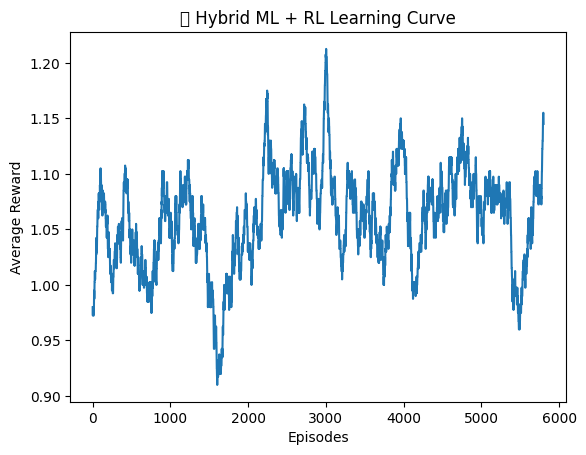

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# -----------------------------
# Load and prepare data
# -----------------------------
data = pd.read_csv("diabetes.csv")
data = data.fillna(data.mean(numeric_only=True))

X = data.drop(columns=["Outcome"])
y = data["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Step 1: Train baseline ML model (teacher)
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42
)
rf.fit(X_train, y_train)
teacher_preds = rf.predict(X_test)
teacher_acc = accuracy_score(y_test, teacher_preds) * 100
print(f"🎓 Random Forest (Teacher) Accuracy: {teacher_acc:.2f}%")

# -----------------------------
# Step 2: Define RL Agent (student)
# -----------------------------
class DiabetesAgent:
    def __init__(self, n_actions, n_features, epsilon=0.1, alpha=0.01):
        self.epsilon = epsilon
        self.alpha = alpha
        self.Q = np.zeros((n_actions, n_features))

    def choose_action(self, state):
        q_values = np.dot(self.Q, state)
        if random.random() < self.epsilon:
            return random.randint(0, 1)
        return np.argmax(q_values)

    def update(self, state, action, reward):
        prediction = np.dot(self.Q[action], state)
        self.Q[action] += self.alpha * (reward - prediction) * state

# -----------------------------
# Step 3: Train RL Agent guided by teacher
# -----------------------------
agent = DiabetesAgent(n_actions=2, n_features=X_train.shape[1], epsilon=0.1, alpha=0.01)
episodes = 6000
rewards = []

for _ in range(episodes):
    i = random.randint(0, len(X_train) - 1)
    state = X_train[i]
    true_label = y_train.iloc[i]

    # teacher gives soft guidance
    teacher_action = rf.predict([state])[0]
    action = agent.choose_action(state)

    # reward is stronger if both agree and correct
    reward = 0
    if action == true_label:
        reward = 1
        if action == teacher_action:
            reward += 0.5  # consistency bonus
    agent.update(state, action, reward)
    rewards.append(reward)

# -----------------------------
# Step 4: Evaluate RL Agent
# -----------------------------
correct = 0
for i in range(len(X_test)):
    state = X_test[i]
    true_label = y_test.iloc[i]
    action = agent.choose_action(state)
    if action == true_label:
        correct += 1

rl_acc = correct / len(X_test) * 100
print(f"🤖 RL Agent (Student) Accuracy: {rl_acc:.2f}%")

# -----------------------------
# Step 5: Show learning curve
# -----------------------------
avg_rewards = np.convolve(rewards, np.ones(200)/200, mode='valid')
plt.plot(avg_rewards)
plt.title("🏆 Hybrid ML + RL Learning Curve")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.show()



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


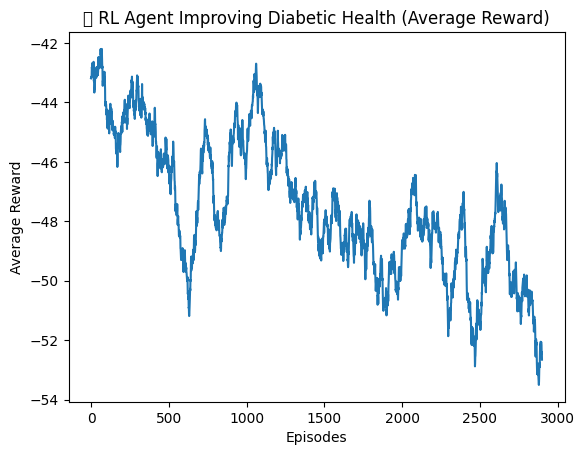

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --------------------------------
# Simulated Environment
# --------------------------------
class DiabetesEnv:
    def __init__(self):
        self.reset()

    def reset(self):
        # health state [glucose, BMI, activity_level]
        self.state = np.array([random.uniform(150, 250), random.uniform(25, 35), random.uniform(0, 1)])
        return self.state

    def step(self, action):
        glucose, bmi, activity = self.state
        done = False

        # Actions: 0=Do Nothing, 1=Exercise, 2=Diet, 3=Medication
        if action == 1:
            glucose -= random.uniform(5, 15)
            activity += 0.1
        elif action == 2:
            glucose -= random.uniform(10, 20)
            bmi -= random.uniform(0.3, 0.7)
        elif action == 3:
            glucose -= random.uniform(15, 25)
        else:
            glucose += random.uniform(2, 8)

        # reward: improvement in glucose level
        reward = -abs(glucose - 100) / 100.0  # closer to 100 is better

        # terminate if cured or unhealthy
        if glucose <= 110:
            done = True
            reward += 2  # cure bonus
        elif glucose >= 300:
            done = True
            reward -= 2

        # normalize and clip
        glucose = np.clip(glucose, 60, 300)
        bmi = np.clip(bmi, 18, 40)
        activity = np.clip(activity, 0, 1)
        self.state = np.array([glucose, bmi, activity])

        return self.state, reward, done

# --------------------------------
# RL Agent (Q-Learning)
# --------------------------------
class DiabetesAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = {}
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def get_state_key(self, state):
        return tuple(np.round(state, 1))

    def choose_action(self, state):
        state_key = self.get_state_key(state)
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.n_actions)
        if random.random() < self.epsilon:
            return random.randint(0, self.n_actions - 1)
        return np.argmax(self.q_table[state_key])

    def update(self, state, action, reward, next_state):
        s_key = self.get_state_key(state)
        n_key = self.get_state_key(next_state)
        if n_key not in self.q_table:
            self.q_table[n_key] = np.zeros(self.n_actions)

        predict = self.q_table[s_key][action]
        target = reward + self.gamma * np.max(self.q_table[n_key])
        self.q_table[s_key][action] += self.alpha * (target - predict)

# --------------------------------
# Training Loop
# --------------------------------
env = DiabetesEnv()
agent = DiabetesAgent(n_actions=4)

episodes = 3000
rewards = []

for ep in range(episodes):
    state = env.reset()
    total_reward = 0
    for step in range(50):
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.update(state, action, reward, next_state)
        total_reward += reward
        state = next_state
        if done:
            break
    rewards.append(total_reward)

# --------------------------------
# Results
# --------------------------------
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("🏥 RL Agent Improving Diabetic Health (Average Reward)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.show()


/tmp/ipython-input-1955901953.py:48: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1955901953.py:48: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


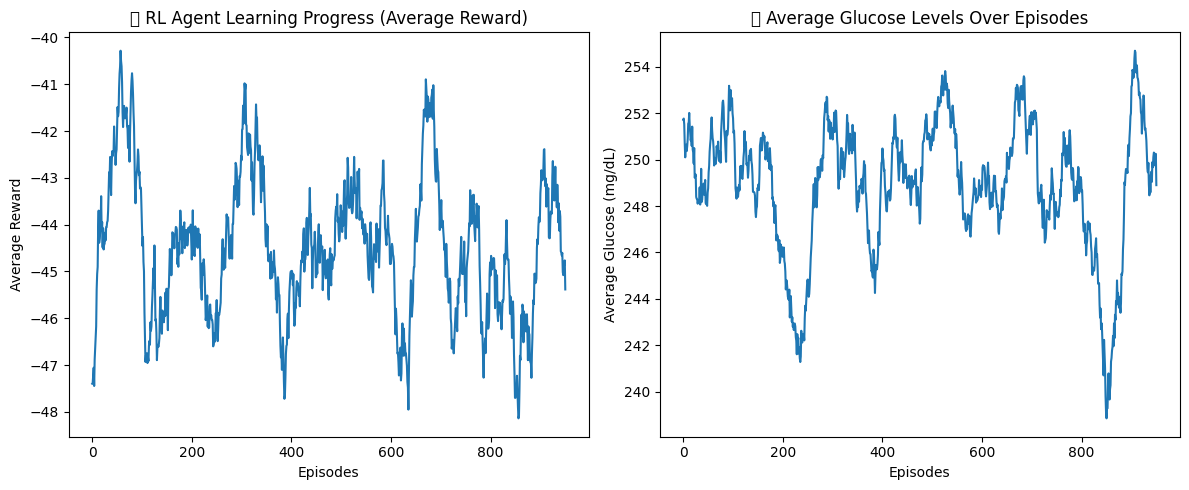

In [ ]:
# --------------------------------
# Extended Training with Glucose Tracking
# --------------------------------
env = DiabetesEnv()
agent = DiabetesAgent(n_actions=4)

episodes = 1000
avg_rewards = []
avg_glucose = []

for ep in range(episodes):
    state = env.reset()
    total_reward = 0
    glucose_values = []

    for step in range(50):
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.update(state, action, reward, next_state)

        total_reward += reward
        glucose_values.append(next_state[0])  # track glucose level
        state = next_state

        if done:
            break

    avg_rewards.append(total_reward)
    avg_glucose.append(np.mean(glucose_values))

# --------------------------------
# 📈 Plot Learning Curves
# --------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(np.convolve(avg_rewards, np.ones(50)/50, mode='valid'))
plt.title("🏥 RL Agent Learning Progress (Average Reward)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")

plt.subplot(1,2,2)
plt.plot(np.convolve(avg_glucose, np.ones(50)/50, mode='valid'))
plt.title("💉 Average Glucose Levels Over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Average Glucose (mg/dL)")

plt.tight_layout()
plt.show()


In [ ]:
# --------------------------------
# 🧠 Generate Summary of Learned Policy
# --------------------------------

actions = ["Do Nothing", "Exercise", "Diet", "Medication"]

def summarize_rl_policy(agent):
    summary = {"Exercise": 0, "Diet": 0, "Medication": 0, "Do Nothing": 0}
    for s_key, q_vals in agent.q_table.items():
        best_action = np.argmax(q_vals)
        summary[actions[best_action]] += 1

    total = sum(summary.values())
    print("\n🩺 Personalized Treatment Policy Summary")
    print("=========================================")
    for act, count in summary.items():
        print(f"{act:<12}: {(count/total)*100:.2f}% preference")

    # Generate human-readable plan
    best = max(summary, key=summary.get)
    print("\n💡 Recommended Approach Based on Learning:")
    if best == "Exercise":
        print("➡ Focus on regular physical activity to improve insulin sensitivity.")
    elif best == "Diet":
        print("➡ Maintain a controlled diet rich in fiber and low in refined sugar.")
    elif best == "Medication":
        print("➡ Medical intervention is most effective at your glucose range.")
    else:
        print("➡ Minimal intervention required — condition is under control.")

summarize_rl_policy(agent)



🩺 Personalized Treatment Policy Summary
Exercise    : 89.32% preference
Diet        : 0.98% preference
Medication  : 0.01% preference
Do Nothing  : 9.68% preference

💡 Recommended Approach Based on Learning:
➡ Focus on regular physical activity to improve insulin sensitivity.


In [ ]:
pip install streamlit scikit-learn pandas numpy matplotlib joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.1 MB/s eta 0:00:00


In [ ]:
streamlit run /mnt/data/diabetes_rl_app.py


SyntaxError: invalid syntax (ipython-input-558546087.py, line 1)